#Some librarires needed

In [ ]:
!pip install imblearn
!pip install auto-sklearn
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Introduction

 <img src='https://paginas.fe.up.pt/~lfc-scc/imgs/Logo%20novo%20FEUPbranco.jpg'>

> Universidade do Porto

Master Degree in Engineering and Data Science

> Course: Introdução à Aprendizagem Computacional e Extração de Conhecimento

Project developed by Diogo Cruz and Vasco Bartolomeu

Porto, 4 December 2022

> **Regression task: Predictive algorithm for house pricing**









#1-Project understanding –  What is the main goal of the project?

This project was developed within the scope of the subject Introduction to Computational Learning and Knowledge Extraction. Our aim with this project is to apply the knowledge acquired as part of this course. We pretend to develop a data mining project using CRISP-DM methodology:

*   1-Business understanding – What does the business need?
*   2-Data understanding – What data do we have / need? Is it clean?
*   3-Data preparation – How do we organize the data for modeling?
*   4-Modeling – What modeling techniques should we apply?
*   5-Evaluation – Which model best meets the business objectives?
*   6-Deployment – How do stakeholders access the results?

We pretend to use a few preprocessing methods and learning algorithms and will understand and explain some model evaluation methodologies and a few evaluation measures.

The goal of this project is to build a predictive model that can predict house prices and understand which predictive attributes have more impact on house prices. For this predictive task we need to understand the most relavant attributes that influence the house price. We will do a Regression task to build a predictive model from the labeled (train) instances in the data, which maps a vector of predictive attribute values to labels.


*ToDo:*

Determine Data Mining goals:

Produce project plan:

#2-Data understanding – What data do we have / need? Is it clean?

Collect Data

The dataset was collected on kaggle

In [ ]:
#Read dataset
data = pd.read_csv("/content/drive/MyDrive/Feup/ACEC/Project/House-Price-Prediction-clean.csv")

In [ ]:
#vou ter de comentar no fim
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


#Describe data

Our dataset has 1460 instances and 32 attributes.

We can find a short resume about dataset in this link: https://docs.google.com/spreadsheets/d/19J94wbIzUKRw9O7HljmtjC6OIlWoO8HgZRXdbfEC3EI/edit#gid=1674411443

In [ ]:
#size of dataset
print("Shape of dataset ",data.shape)
print("Number of intances: ",data.shape[0])
print("Number of Attributes: ",data.shape[0])

Shape of dataset  (1460, 32)
Number of intances:  1460
Number of Attributes:  1460


In [ ]:
#Attributes available on dataset
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#Analysis of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

ToDo: Explain variables what represent each variable

In [ ]:
#checking Missing data
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
#some Location statistics
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Explore data

Analysis of target variable

In [ ]:
#Location statistics of target variable - Sale Price
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


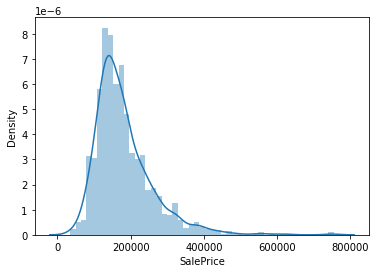

In [ ]:
# normality check for the target
ax = sns.distplot(data['SalePrice'])
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


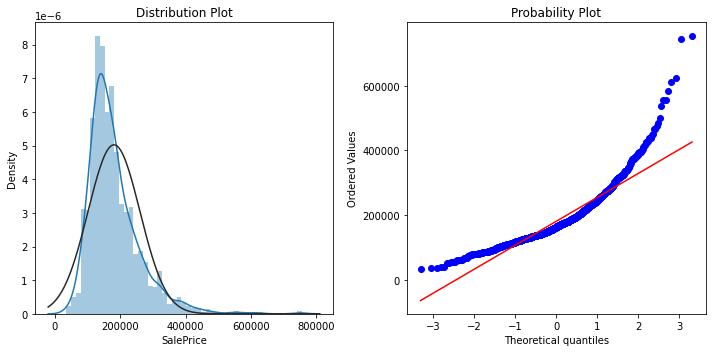

In [ ]:
normality_plot(data['SalePrice'])

In [ ]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


After looking at the target distribution. As this is a regression task, we want the target to be normally distributed.

*   It deviate from the normal distribution
*   Have appreciable positive skewness
*   Show peakedness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


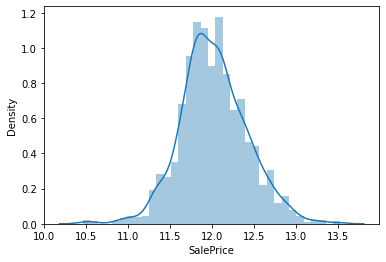

In [ ]:
#One of the methods to normalize right-skewed data is using log transformation because big values will be pulled to the center. However, log(0) is Nan, so I will use log(1+X) to fix skewness instead.
#y = np.log(1 + y)

# log-transform the dependent variable for normality
y_train = np.log(data['SalePrice'])

ax = sns.distplot(y_train)
plt.show()

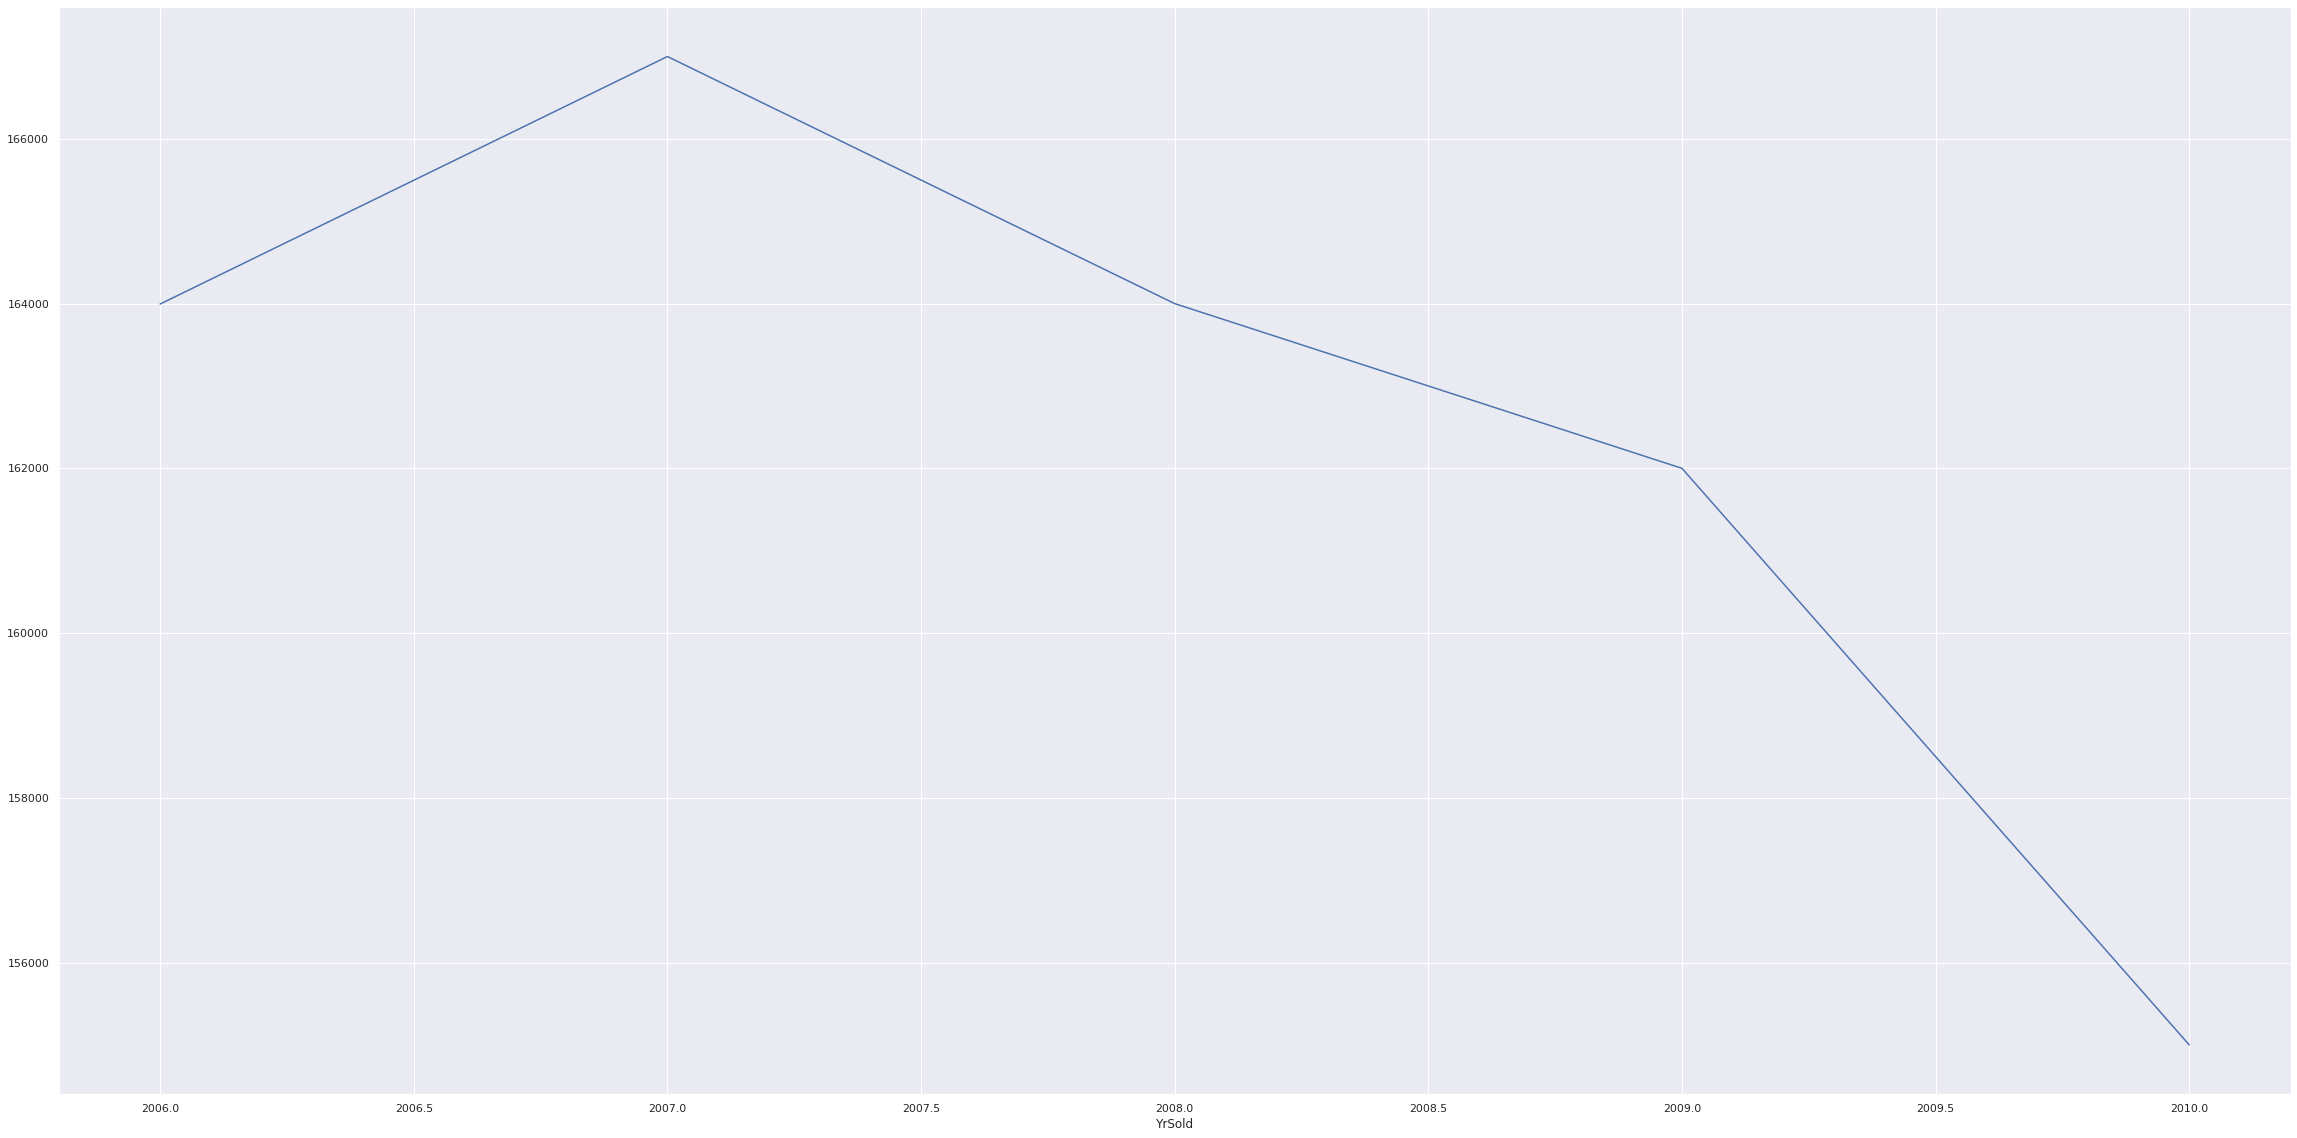

In [ ]:
data.groupby('YrSold')['SalePrice'].median().plot()

The median price of houses sold has been declining since 2007

Relationship with numerical variables

(correct here because we may not log transform skewned variables)

In the next step I will examine skewness in the rest of numerical variables and use log transformation to fix them,

Fixing skewness in other numerical variables

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Below are skewed features in our original train data

In [ ]:
#Analysis of skewness in the rest of numerical variables
skewness = data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
KitchenAbvGr      4.488397
ScreenPorch       4.122214
EnclosedPorch     3.089872
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


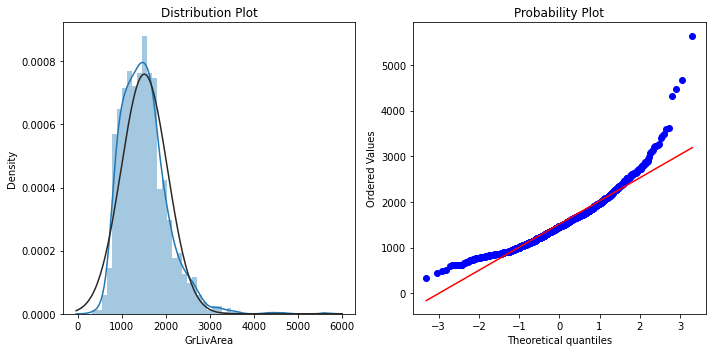

In [ ]:
normality_plot(data['GrLivArea'])

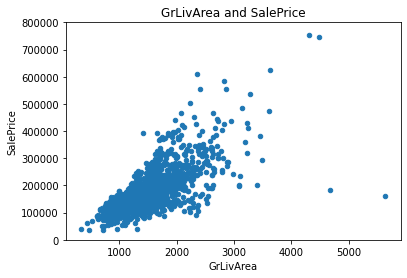

In [ ]:
#scatter plot grlivarea/saleprice
data_aux = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
data_aux.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), title='GrLivArea and SalePrice');
#It seems that 'SalePrice' and 'GrLivArea' have a linear relationship.

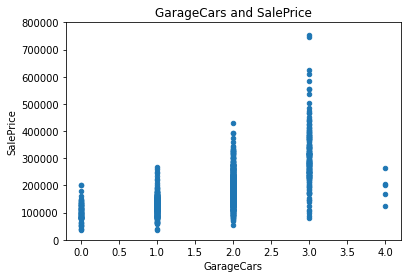

In [ ]:
#scatter plot grlivarea/saleprice
data_aux = pd.concat([data['SalePrice'], data['GarageCars']], axis=1)
data_aux.plot.scatter(x='GarageCars', y='SalePrice', ylim=(0,800000), title='GarageCars and SalePrice');

In [ ]:
quality_pivot = data.pivot_table(index='GarageCars',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


In [ ]:
print ("Count Houses sold: \n")
print (data.GarageCars.value_counts(), "\n")

Count Houses sold: 

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64 



5 houses sold with capacity for 4 cars eitherway the Median price on houses with a garage with capacity for 3 cars is bigger than 4 cars.

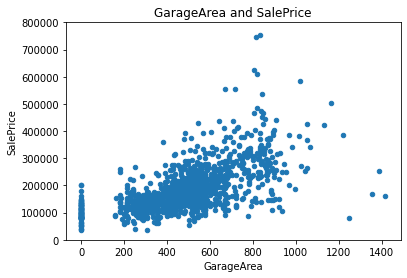

In [ ]:
data_aux = pd.concat([data['SalePrice'], data['GarageArea']], axis=1)
data_aux.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000), title='GarageArea and SalePrice');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f7e652820>,
      dtype=object)

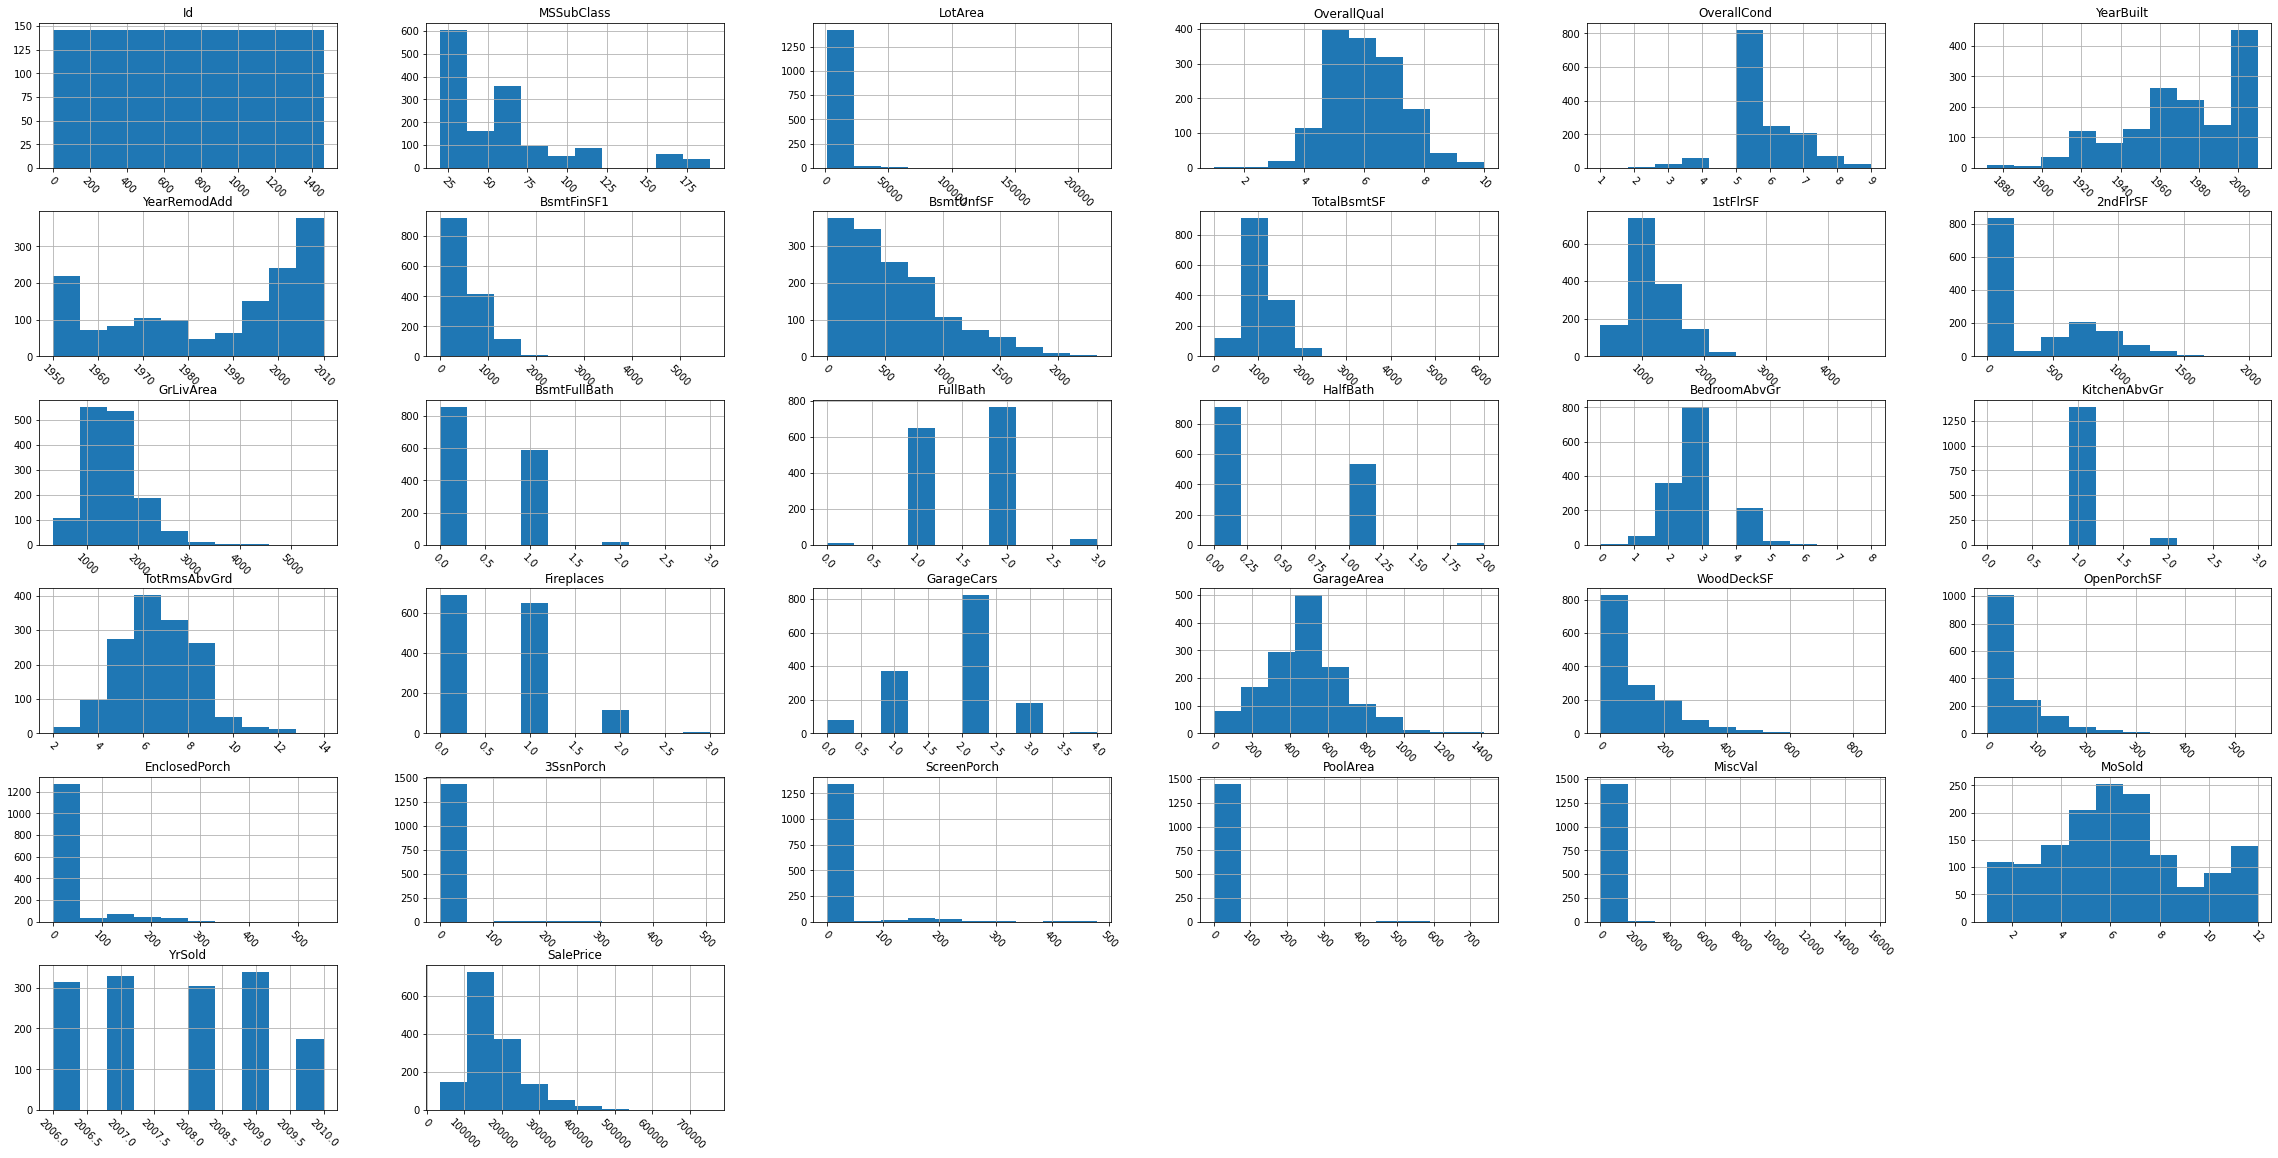

In [ ]:
data.dtypes[data.dtypes!='object']
data.hist(figsize=(40,20), xrot=-45)

Relationship with categorical features¶

In [ ]:
#Order Importance: OverralQuall, GrLivArea, KitchenAbvGr, GarageCars, 2ndFlsSF, WoodDeckSF, TotRmsAbvGrd, TotalBsmSF, BsmFin1, 1stFlsSF, LotArea, GarageArea, YearBuilt, Fireplaces, Overallcond, YearRemondAdd, BsmFullBath, OpenPorchSF, MoSold, BsmtUniSF

Text(0, 0.5, 'Sum of sales')

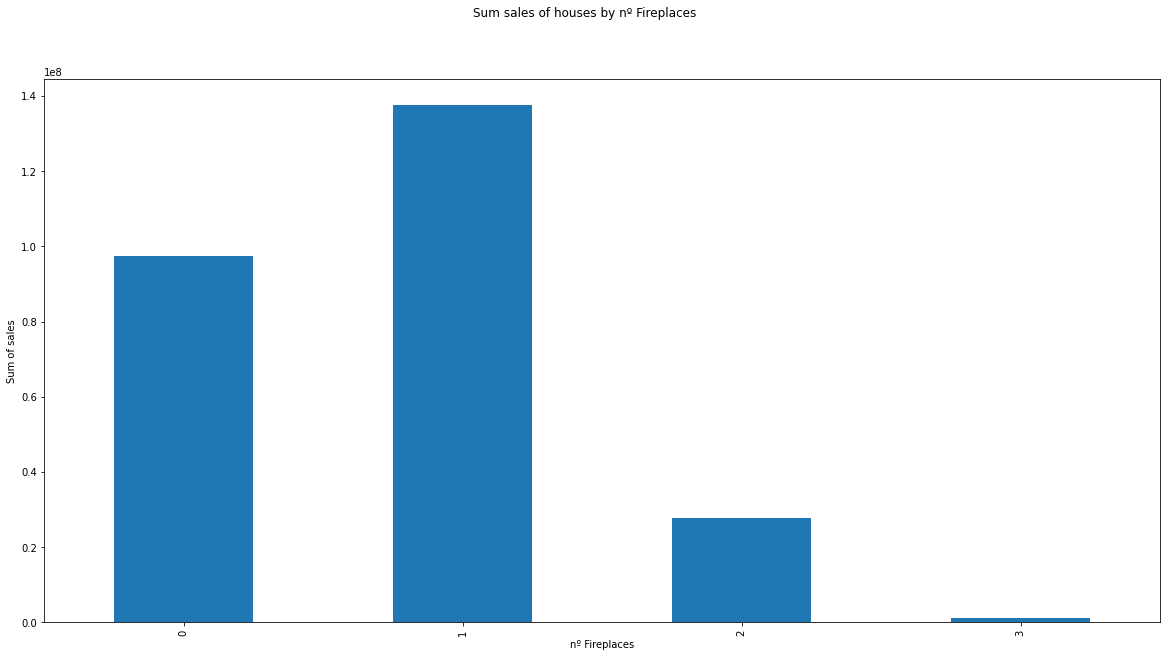

In [ ]:
#Remove this one
k = data.groupby(['Fireplaces']).sum()['SalePrice']
plt.rcParams['figure.figsize'] = [20, 10]
k.plot.bar()
# Add title and axis names
plt.suptitle('Sum sales of houses by nº Fireplaces')
plt.xlabel('nº Fireplaces')
plt.ylabel('Sum of sales')

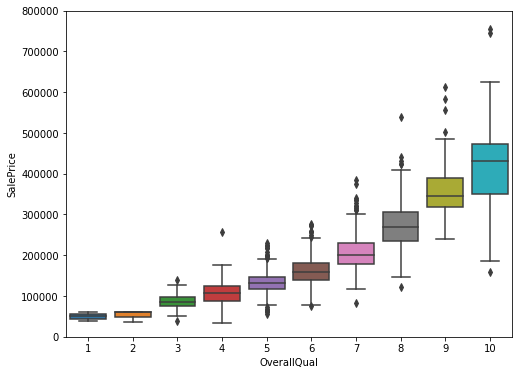

In [ ]:
#box plot overallqual/saleprice
data_aux2 = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data_aux2)
fig.axis(ymin=0, ymax=800000);

In [ ]:
quality_pivot = data.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


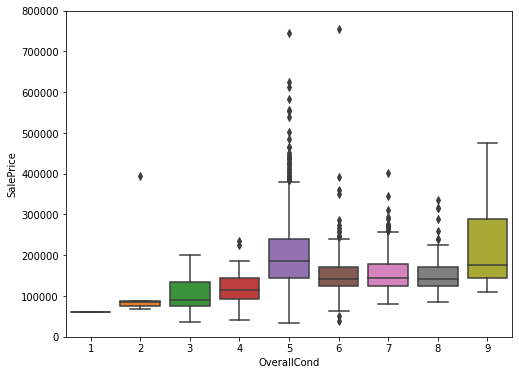

In [ ]:
#box plot OverallCond/saleprice
data_aux4 = pd.concat([data['SalePrice'], data['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallCond", y="SalePrice", data=data_aux4)
fig.axis(ymin=0, ymax=800000);

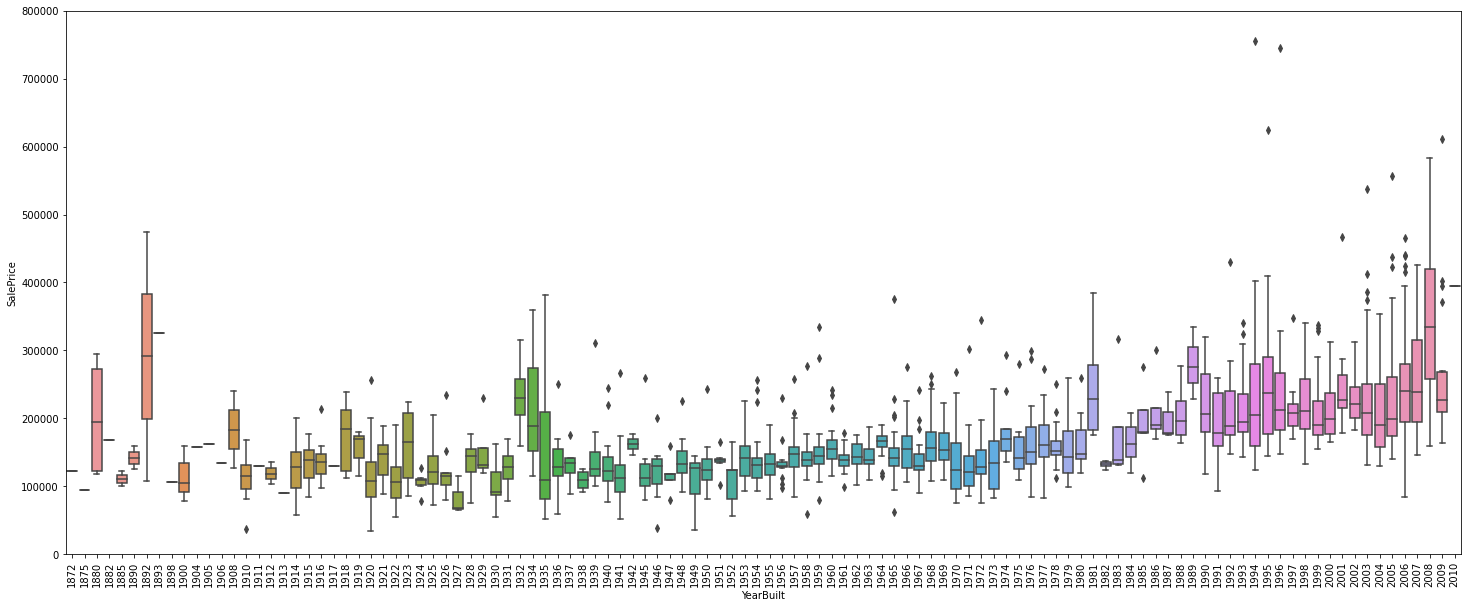

In [ ]:
data_aux3 = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data_aux3)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

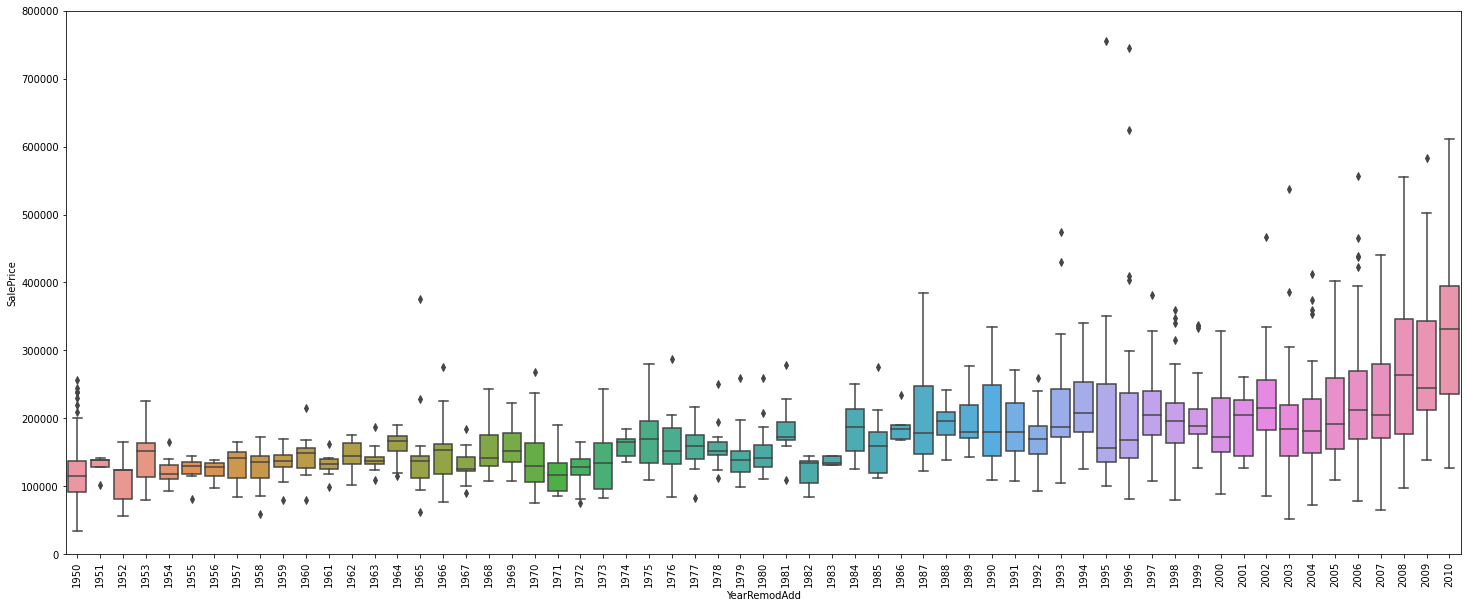

In [ ]:
data_aux5 = pd.concat([data['SalePrice'], data['YearRemodAdd']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=data_aux5)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Text(0, 0.5, 'Sum of sales')

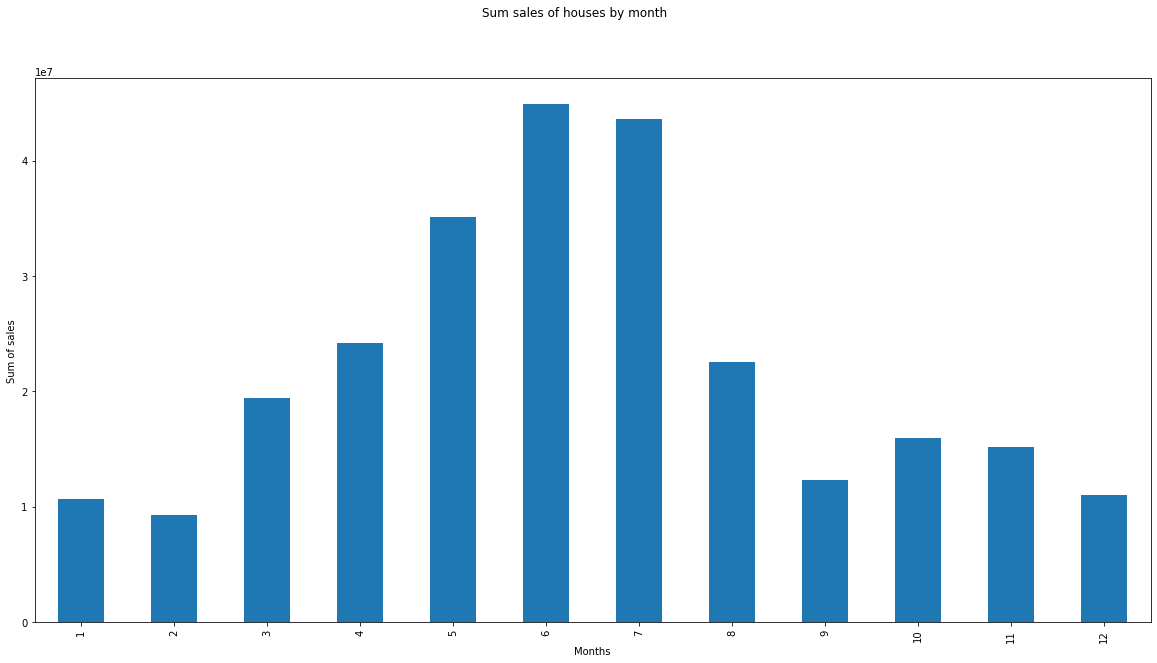

In [ ]:
#Junho e Julho foram os meses em que o valor das vendas foi maior
k = data.groupby(['MoSold']).sum()['SalePrice']
plt.rcParams['figure.figsize'] = [20, 10]
k.plot.bar()
# Add title and axis names
plt.suptitle('Sum sales of houses by month')
#plt.title('Sum sales of houses by month')
plt.xlabel('Months')
plt.ylabel('Sum of sales')

#Correlation Matrix

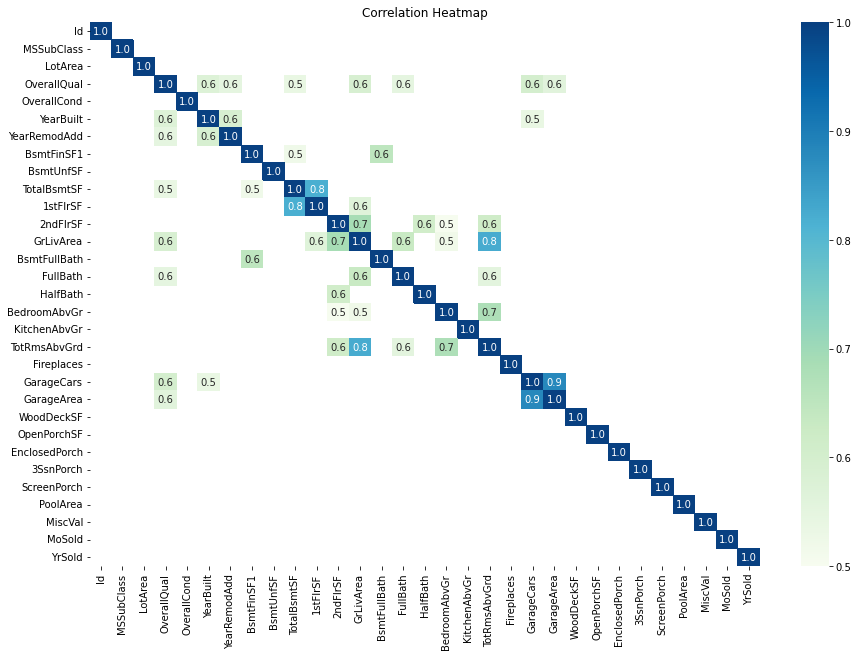

In [ ]:
# Create correlation matrix from data excluding `SalePrice`
corr_mat = data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

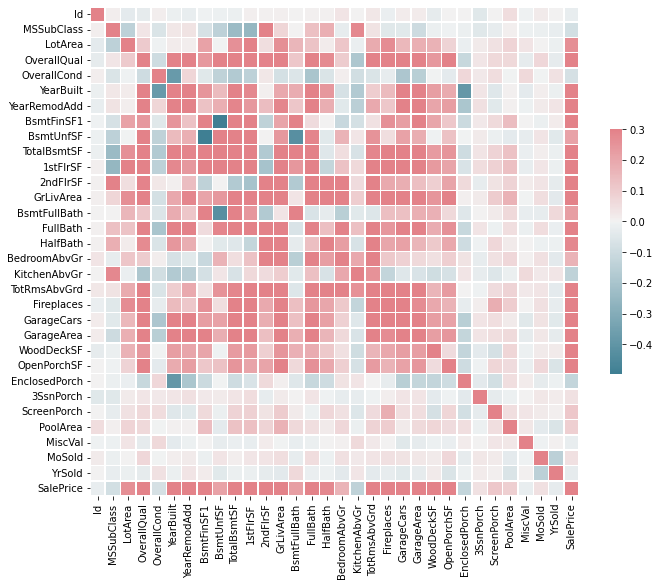

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


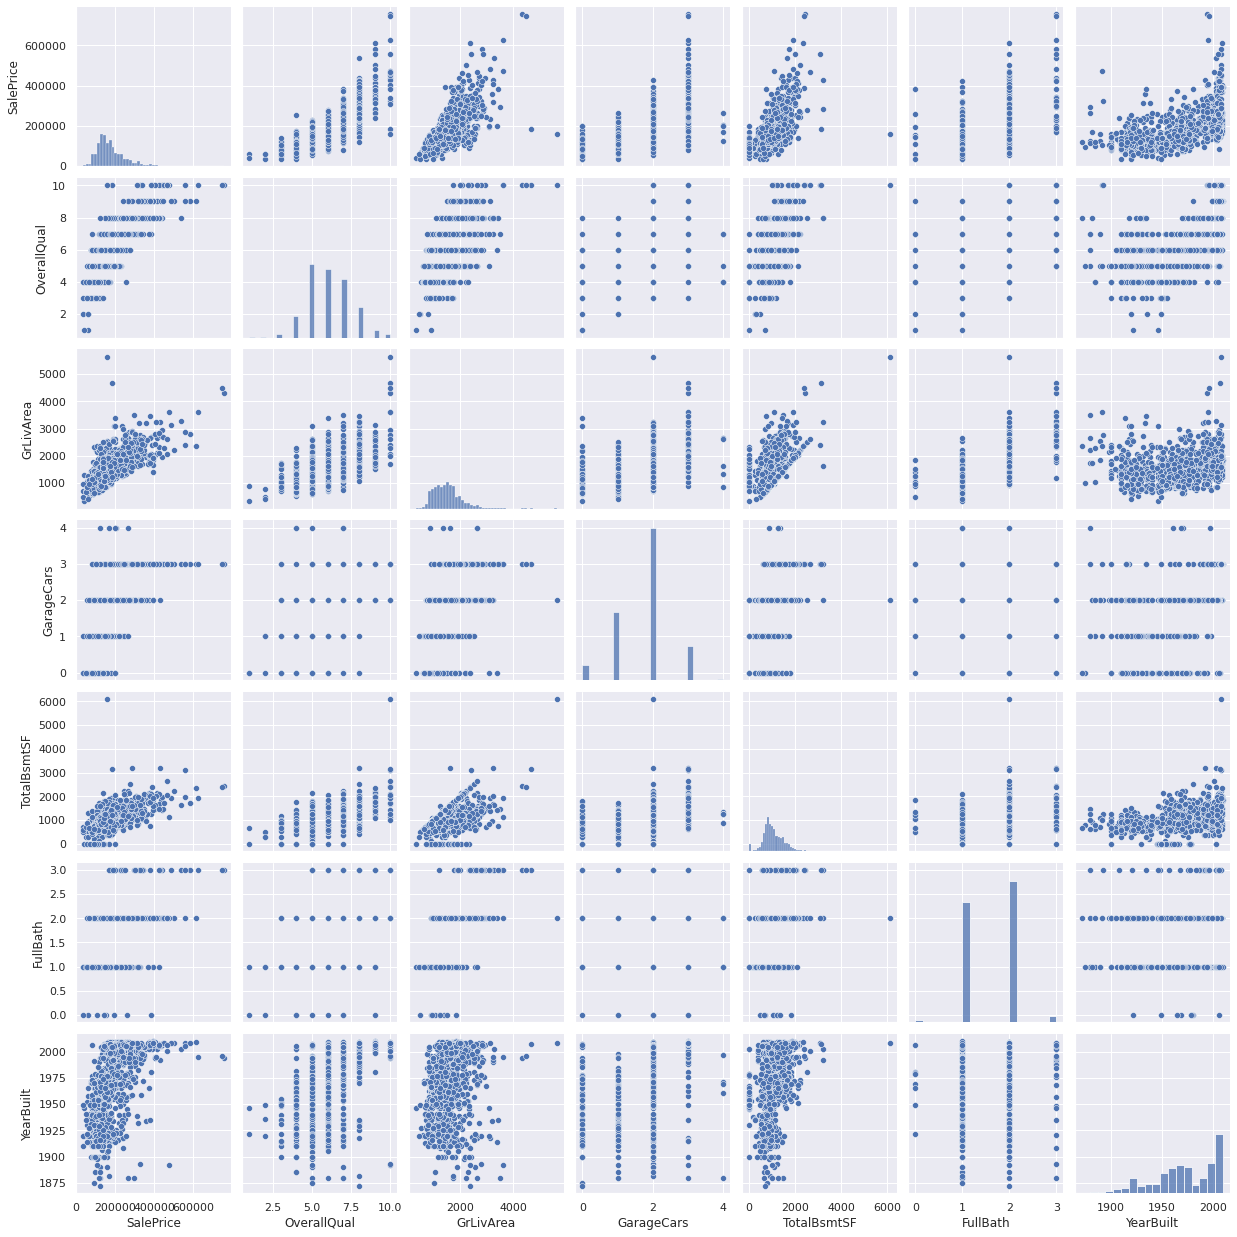

In [ ]:
#Scatter plots between 'SalePrice' and correlated variables
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

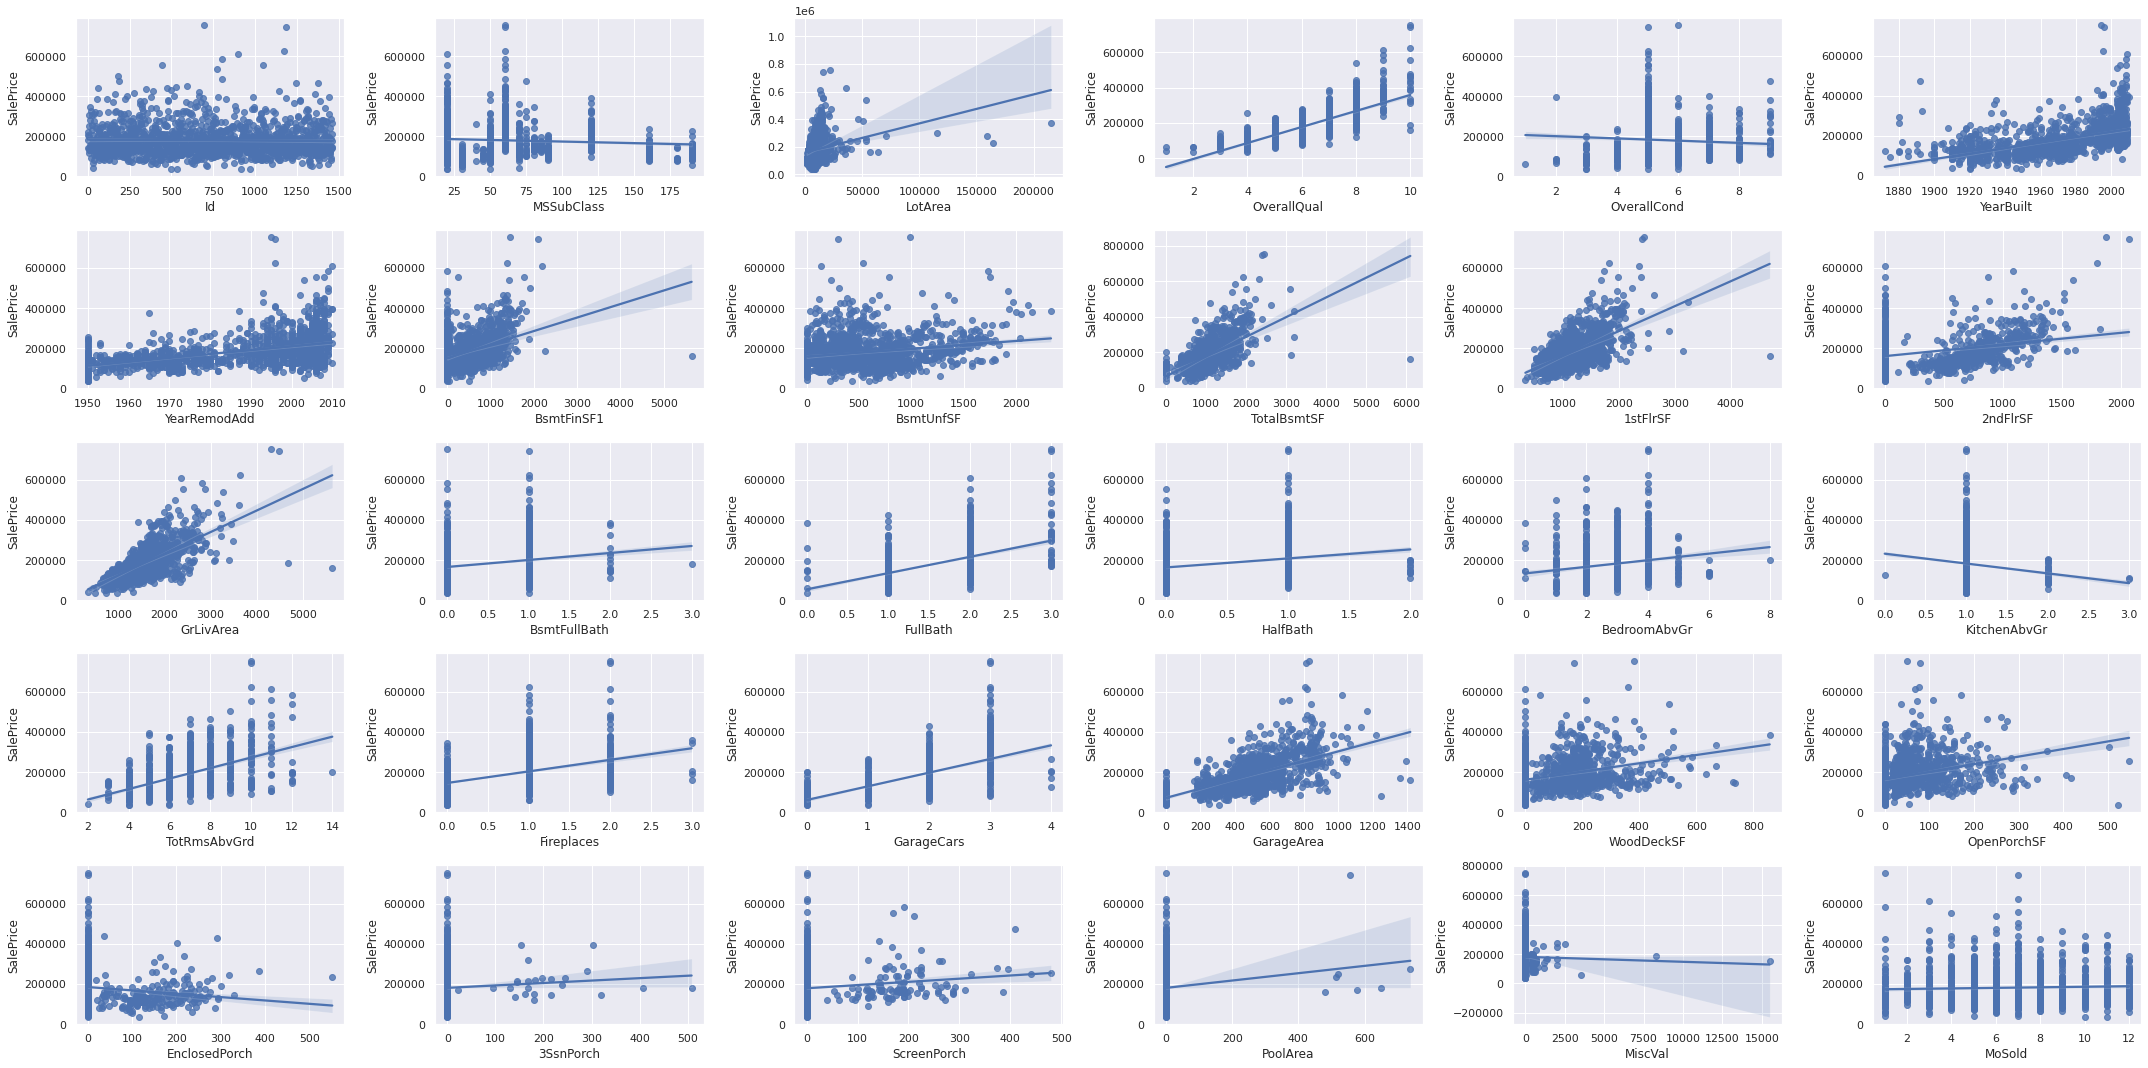

In [ ]:
# relation to the target
fig = plt.figure(figsize=(30,15))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=data.iloc[:,i], y=data['SalePrice'])

plt.tight_layout()
plt.show()

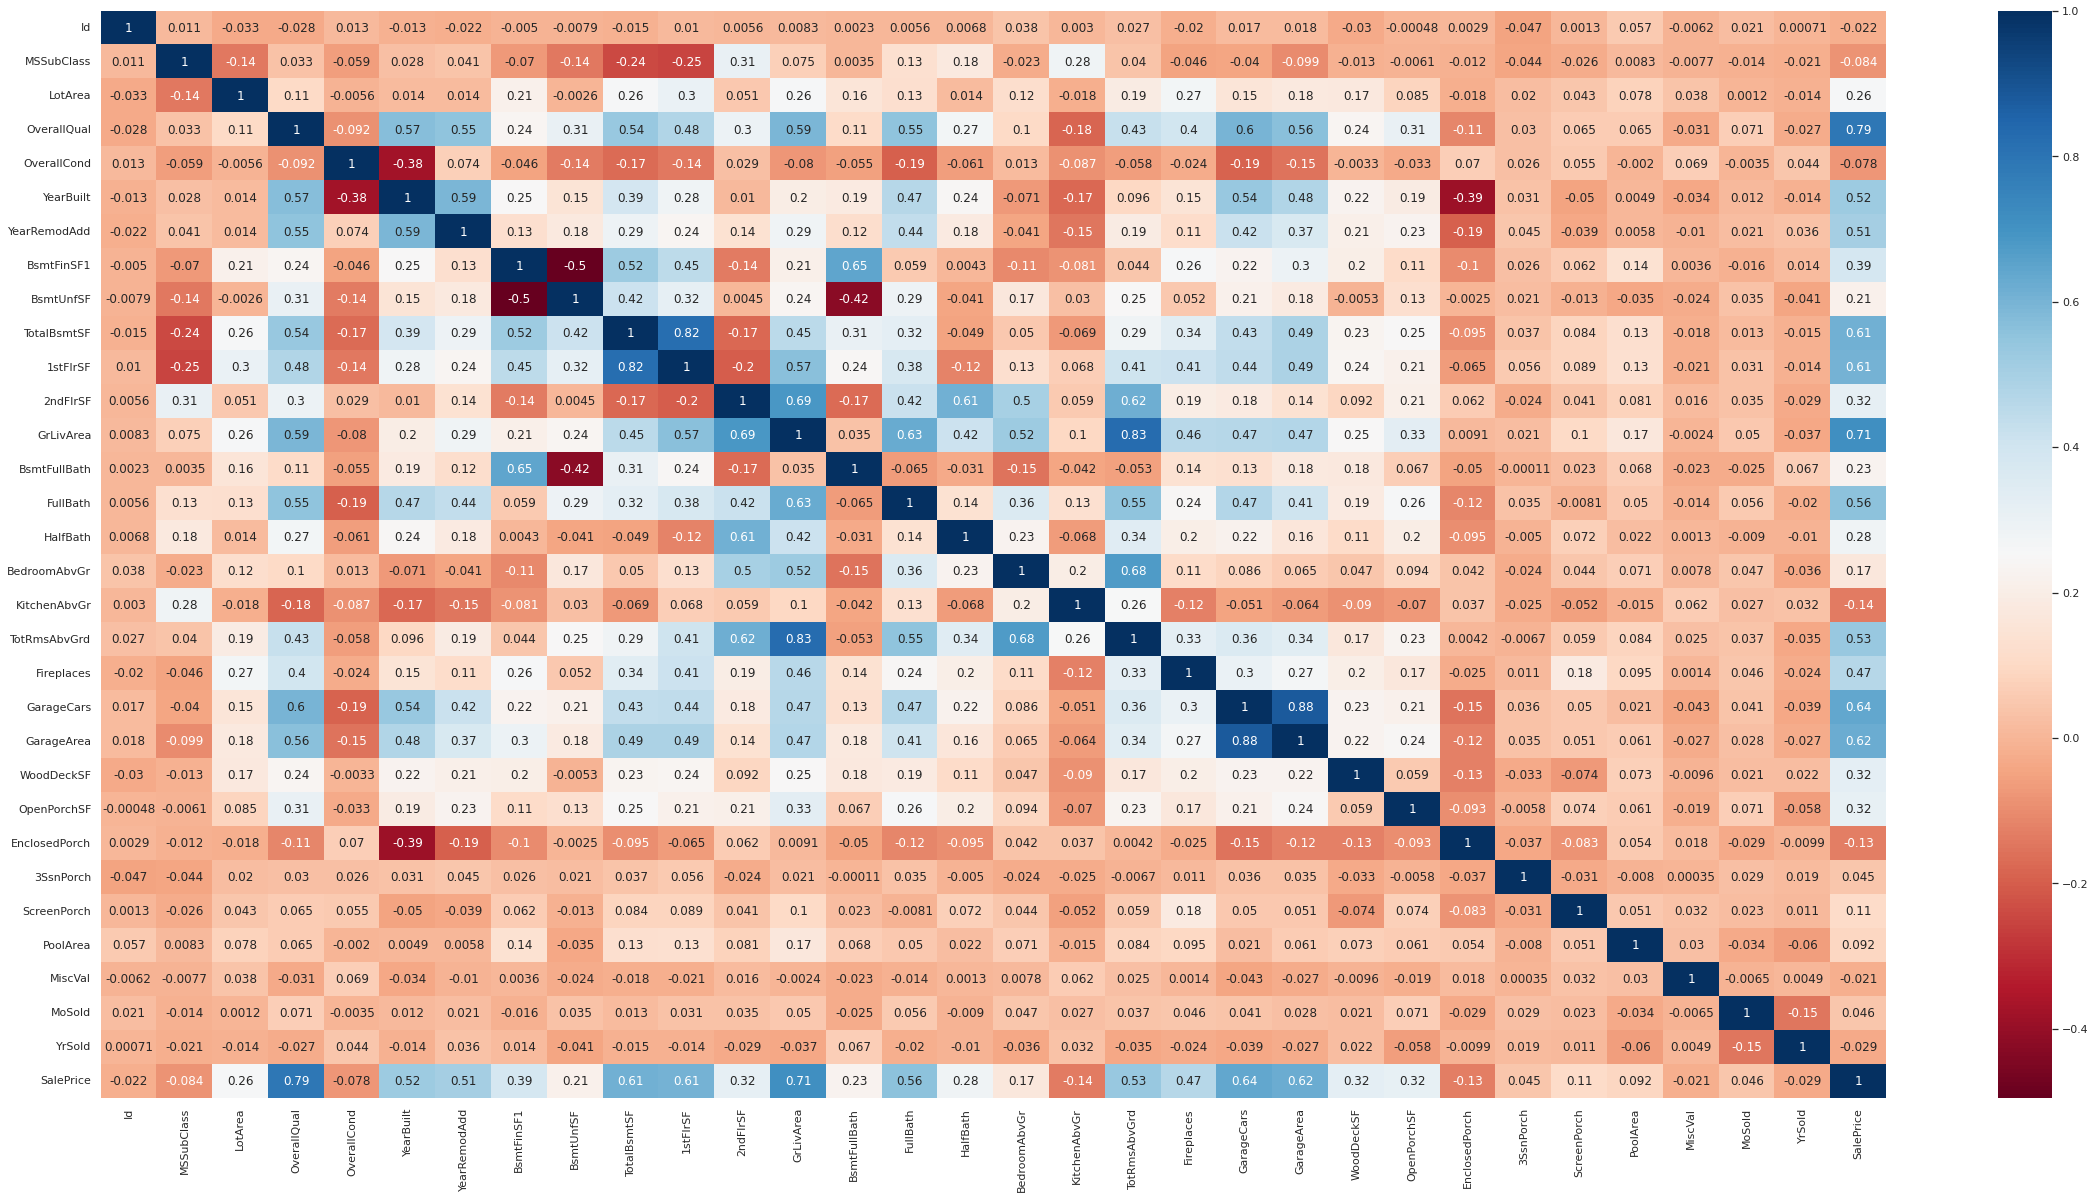

In [ ]:
cor=data.corr()
sns.set(rc={'figure.figsize':(40,20)})
sns.heatmap(cor, annot=True,cmap='RdBu');

Highest correlations are between area of GriLivArea and TotRmsAbvGr; TotRmsAbvGrd and BedroomsAbGr

In [ ]:
# we compute correlation coeffs of all variables with SalePrice and then sort by decreasing order.
# we show top 21 rows because SalePrice is included in the list and we want to see top 20. 
# we drop first row so that SalePrice doesn't show
top20_sales = abs(data.corr()["SalePrice"].sort_values(ascending = False)).head(21)
top20_sales = pd.DataFrame(top20_sales)
top20_sales.rename(columns={"SalePrice": "Correlation coeff with SalePrice"})
top20_sales = top20_sales.iloc[1:]
top20_sales

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Regarding price the variables with higher correlation are OverallQual, GrLivArea, GarageCars and GarageArea.

#3 - Data preparation – How do we organize the data for modeling?

In the 3rd step of CRISP-DM methodology - Data preparation - We select the data to be used on the model and did analasys of missing values and outliers to ensure the data is clean and well format to apply the model.

Missing values analysis

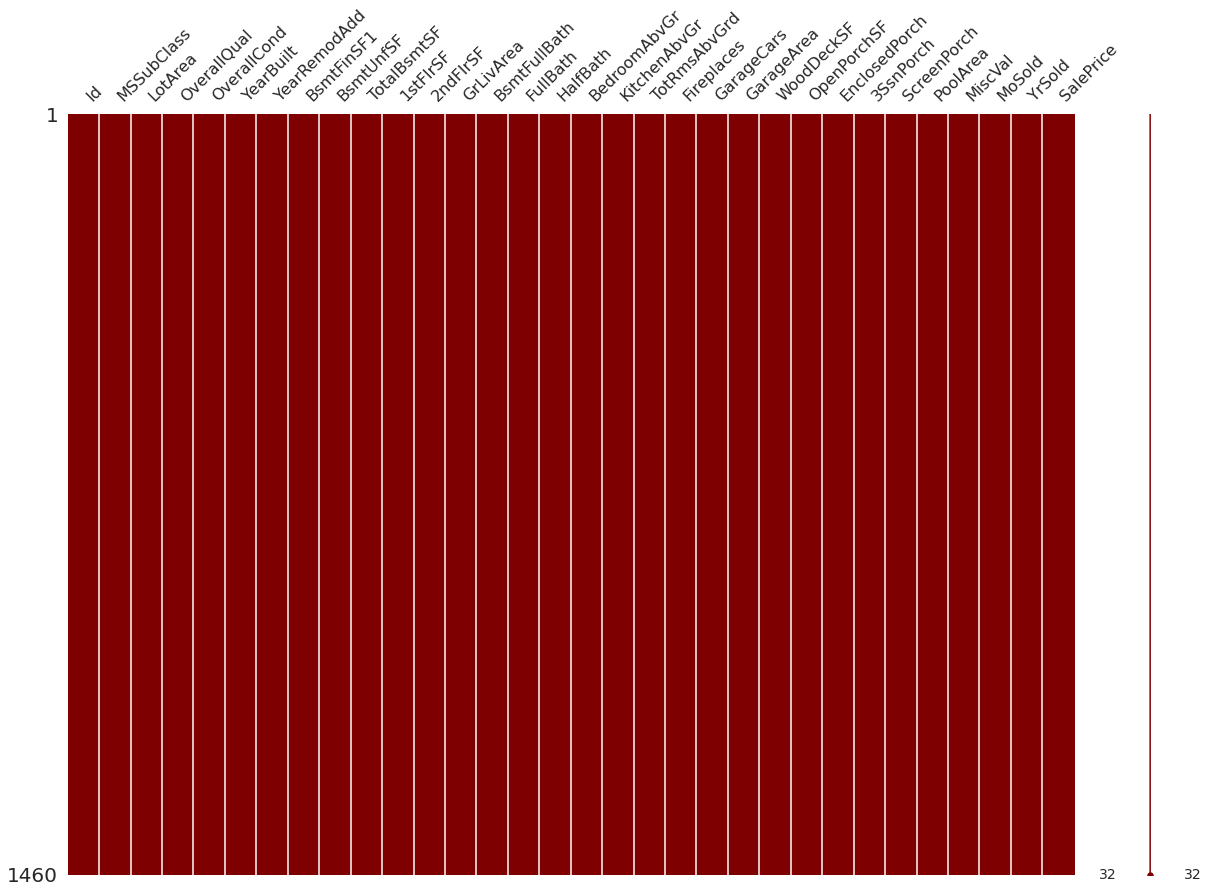

In [ ]:
# search for missing datµa
import missingno as msno
msno.matrix(df=data, figsize=(20,14), color=(0.5,0,0))

As we can see from the image above the dataset does not have any missing value to handle. So, will now check the existance of any Ouliers.

Outliers analysis

Outliers is something that we should be aware and treat each case accordingly with context and importance of each attribute because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.